In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [191]:
data2 = pd.read_csv('data2.csv')
data2.drop(columns=['Unnamed: 0'], inplace=True)

In [192]:
columns = ['x', 'y', 'z1', 'z3', 'z4', 'z5']

x = data2[columns]
y = data2['z']

In [193]:
mapper = DataFrameMapper([(data2.columns, MinMaxScaler())])
scaled_feature = mapper.fit_transform(data2.copy())
data = pd.DataFrame(scaled_feature, index=data2.index, columns=data2.columns)
data

,x,y,z1,z3,z4,z5,z
0,0.621860,0.000000,0.348737,0.163803,0.511964,0.375000,0.893110
1,0.690698,0.006889,0.299579,0.409381,0.550115,0.371787,0.822691
2,0.914884,0.043628,0.140632,0.271130,0.729727,0.330977,0.431337
3,0.626047,0.051665,0.253053,0.364794,0.625802,0.391710,0.699641
4,0.610233,0.066590,0.273474,0.293101,0.611154,0.321015,0.533982
...,...,...,...,...,...,...,...
427,0.072558,0.690011,0.210105,0.265315,0.618664,0.293059,0.575210
428,0.506047,0.732491,0.402526,0.494583,0.700544,0.373072,0.883197
429,0.230233,0.738232,0.381158,0.619120,0.601183,0.087404,0.050695
430,0.451628,0.807118,0.253684,0.517420,0.647458,0.375964,0.454322


In [194]:
columns = ['x', 'y', 'z1', 'z3', 'z4', 'z5']

x = data[columns]
y = data['z']

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)

In [195]:
y.mean(), x.shape[1]

(0.4793410983074719, 6)

Epoch 1/150


14/14 [==============================] - 1s 15ms/step - loss: 0.0651 - accuracy: 0.0000e+00 - val_loss: 0.0514 - val_accuracy: 0.0115
Epoch 2/150
14/14 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.0000e+00 - val_loss: 0.0357 - val_accuracy: 0.0115
Epoch 3/150
14/14 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.0029 - val_loss: 0.0296 - val_accuracy: 0.0115
Epoch 4/150
14/14 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.0029 - val_loss: 0.0294 - val_accuracy: 0.0115
Epoch 5/150
14/14 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.0029 - val_loss: 0.0251 - val_accuracy: 0.0115
Epoch 6/150
14/14 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.0029 - val_loss: 0.0246 - val_accuracy: 0.0115
Epoch 7/150
14/14 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.0029 - val_loss: 0.0230 - val_accuracy: 0.0115
Epoch 8/150
14/1

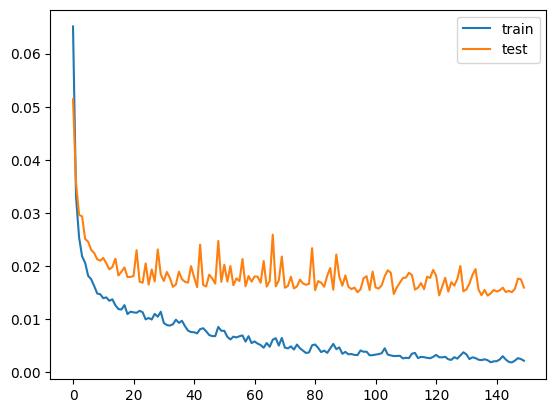

In [196]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

model = Sequential()

model.add(Dense(units=164, input_dim=x.shape[1],  activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=186, activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, epochs=150, batch_size=25, validation_data=(Xtest, ytest))


loss, accuracy = model.evaluate(Xtest, ytest)

print('test loss:', loss, '/n',
      'test accuracy:', accuracy)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()



In [197]:
ypred = model.predict(Xtest)
r2_score(ytest, ypred)

3/3 [==============================] - 0s 2ms/step


0.7386204378636365